## Unsupervised Learning

The purpose of this assgingment is to perform unsupervised learning using K-means algorithm and Hierarchy Agglomerative Clustering Algorithms to define Mall customer segmentation based on Annual Income and Spending score.

Reference: https://www.kaggle.com/datasets/nelakurthisudheer/mall-customer-segmentation

## Import functions

In [643]:
#Importing required modules

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score

import os
import warnings
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

pd.set_option("display.max.columns", None, "display.float_format", lambda x: '%.2f' % x)



## Load and Prepare Data

In [644]:
# load data from local device
data = pd.read_csv('Mall_Customers.csv')
data.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [645]:
# Replace the categorical values on Gender columns; 0 is male and 1 is female.
data['Gender'].replace(['Male', 'Female'],
                     [0, 1], inplace=True)

In [646]:
# Define features used for analysis and display the first 6 rows.
features = ['Annual Income (k$)', 'Spending Score (1-100)']

df = pd.DataFrame(data=data, columns=features)
df.head(6)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76


In [647]:
# Define number of rows, columns and outliers.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


There are 200 rows and 4 columns in this dataset. There is no missing value. All columns have integer data type.

In [648]:
# Confirm that there is no null value.
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [649]:
# Summarize dataset
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00
mean,60.56,50.20
std,26.26,25.82
min,15.00,1.00
25%,41.50,34.75
50%,61.50,50.00
75%,78.00,73.00
max,137.00,99.00


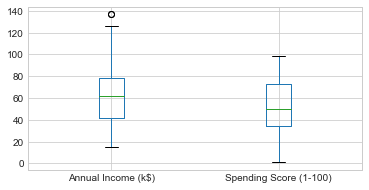

In [650]:
# Display boxplot and check for outliers.
plt.figure(figsize=(6, 3))
boxplot = df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

Boxplot show some outlier

In [651]:
# Check rows that contains values of outlier on Annual Income (k$).
# Assume outlier is where the value is over 125
print(np.where(df['Annual Income (k$)']>125))

(array([196, 197, 198, 199], dtype=int64),)


In [652]:
# Display rows with outlier on Annual Income (k$).
df.loc[196:1999]

,Annual Income (k$),Spending Score (1-100)
196,126,28
197,126,74
198,137,18
199,137,83


In [653]:
# Replace outlier value with mean value.
df['Annual Income (k$)'].replace([137],[60.56], inplace=True)
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00
mean,59.80,50.20
std,25.11,25.82
min,15.00,1.00
25%,41.50,34.75
50%,60.78,50.00
75%,77.25,73.00
max,126.00,99.00


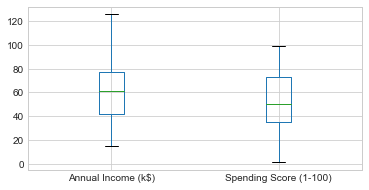

In [654]:
# Display boxplot to confrim outliers are removed.
plt.figure(figsize=(6,3))
boxplot = df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

New boxplot shows no outlier

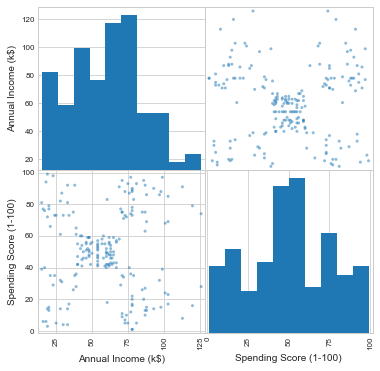

In [655]:
# Display Scatter Matrix
scatter_matrix(df[features],figsize=(6, 6))
plt.show()

There are no correlation between features as scatter matrix shows dispersion

### Standardize the data and plot

In [656]:
# Create and array from the selected features.
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

Text(0, 0.5, 'Spending Score (1-100)')

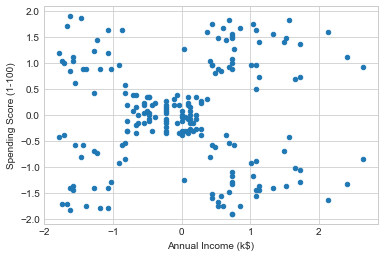

In [657]:
# Plot data from selected features
pd.DataFrame(x, columns = features).plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

# Add labels
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')


## KMeans Clustering

In [658]:
# Make an instance of KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit only on a features matrix
kmeans.fit(x)

# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [659]:
# Assign features
x = pd.DataFrame(x, columns = features)

#### Ploting 

Text(0, 0.5, 'Spending Score (1-100)')

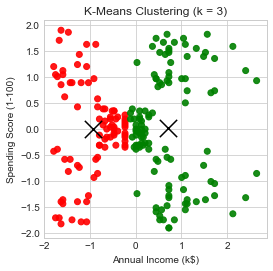

In [660]:
# Plot scatter to display 2 clusters using Annual Income (k$) and Spending Score (1-100) as features
plt.figure(figsize=(4, 4))
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=colormap[labels], alpha = 0.9)
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')
plt.title('K-Means Clustering (k = 3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

2 mall customer clusters are grouped by 
1. low to medium income with low to high spending score.
2. medium to high income with low to high spending score.

In [661]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit only on a features matrix
kmeans.fit(x)

# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [662]:
# Measures how well a dataset was clustered by K-Means
kmeans.inertia_

158.39528414988484

In [663]:
# Compute the mean Silhouette Coefficient 
silhouette_avg = silhouette_score(x, labels)

print('Silhouette Coefficient: ', silhouette_avg, '\n')
print('Silhouette Coefficient of 0.46 indicates that there are overlapping clusters. ')

Silhouette Coefficient:  0.46164717987291476 

Silhouette Coefficient of 0.46 indicates that there are overlapping clusters. 


Text(0, 0.5, 'Spending Score (1-100)')

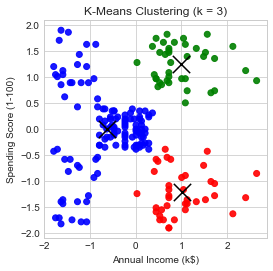

In [664]:
# Plot scatter and display 3 clusters
plt.figure(figsize=(4, 4))
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=colormap[labels], alpha = 0.9)
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')
plt.title('K-Means Clustering (k = 3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

3 mall customer clusters are grouped by 
1. low to medium income with various spending score. 
2. medium to high income with medium to high spending score.
3. medium to high income with low to medium spending score.

## Hierarchical Agglomerative Clustering

In [665]:
from pylab import rcParams

import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [666]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [667]:
# Check dataset
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [668]:
# Assign features to columns
data.columns =  ['CustomerID', 'Gender', 'Age','Annual Income (k$)', 'Spending Score (1-100)']

In [669]:
# Assign selected features to X
X = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
#X.reshape(-1, 1)

In [670]:
# Assign target vector (Age) to y
y = data.loc[:, 'Age'].values
#y.reshape(-1, 1)

In [671]:
# Assign clustering results that hass been generated by hierarchical clustering algorithm.
Z = linkage(X, 'ward')

In [672]:
# Compute the mean Silhouette Coefficient 
silhouette_avg = silhouette_score(X, y)
print('Silhouette Coefficient: ', silhouette_avg, '\n')
print('Silhouette Coefficient of -0.6 indicates that a sample has been assigned to the wrong cluster, as a different cluster is more similar.')

Silhouette Coefficient:  -0.6078019682903125 

Silhouette Coefficient of -0.6 indicates that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


#### Using scipy to generate dendograms

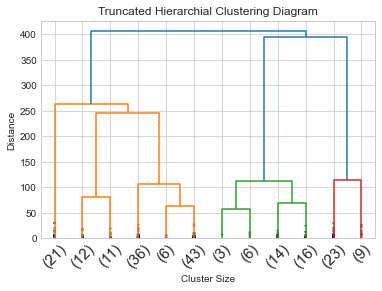

In [673]:
# Display hierarchyical clustering using dendrogram
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

There are 3 clusters genarated by Hierarchical Clustering; Group 1 consists of Mall customers whose spending score is 6, 11, 12, 21, 36, and 43, Group 2 consists of Mall customers of age 3, 6, 14 and 16, and Group 3 consists of Mall customers of age 9 and 23.

#### Test with Agglomerative Clustering

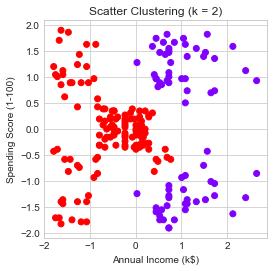

In [674]:
# Plot scatter and display 2 clusters
ac2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(4, 4))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
           c = ac2.fit_predict(X), cmap ='rainbow')
plt.title('Scatter Clustering (k = 2)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

2 mall customer clusters are grouped by 
1. low to medium income with low to high spending score.
2. medium to high income with low to high spending score.

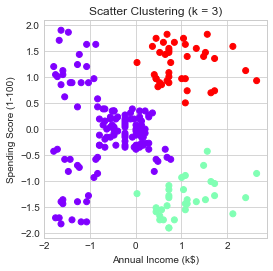

In [675]:
# Plot scatter and display 3 clusters
ac3 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering# Display cluster of 4
plt.figure(figsize =(4, 4))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
           c = ac3.fit_predict(X), cmap ='rainbow')
plt.title('Scatter Clustering (k = 3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

3 mall customer clusters are grouped by 
1. low to medium income with various spending score.
2. medium to high income with medium to high spending score,.
3. medium to high income with low to medium spending score.

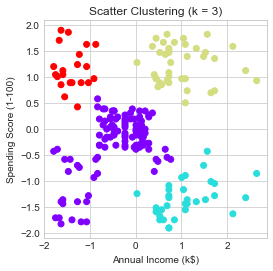

In [676]:
# Plot scatter and display 4 clusters
ac4 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering
plt.figure(figsize =(4, 4))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
           c = ac4.fit_predict(X), cmap ='rainbow')
plt.title('Scatter Clustering (k = 3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

4 mall customer clusters are grouped by 
1. low to medium income with low to medium spending score.
2. low income with medium to high spending score.
3. medium to high income with medium to high spending score.
4. medium to high income with low to medium spending score.

#### Generating hierarchical  Agglomerative clusters

In [677]:
# Split data into train set and test set
df_train, df_test = train_test_split(data, train_size = .80)  # split Train and test into 80/20

Text(0.5, 1.0, 'Clustered by Age')

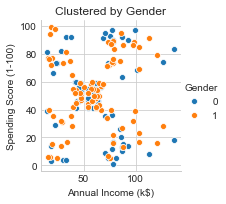

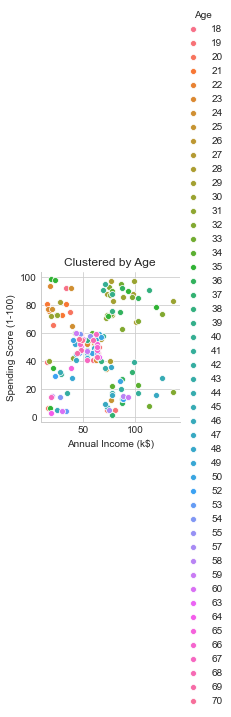

In [678]:
# Display scatterplot with Mall customer segment using Age as criteria for training set
Hclustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_train[features])
df_train = df_train.assign(cluster = Hclustering.labels_)

g.fig.set_size_inches(4, 4)

g = sns.pairplot(x_vars = 'Annual Income (k$)', y_vars = 'Spending Score (1-100)', hue = 'Gender', data=df_train)
plt.title('Clustered by Gender')

g = sns.pairplot(x_vars = 'Annual Income (k$)', y_vars = 'Spending Score (1-100)', hue = 'Age', data=df_train)
plt.title('Clustered by Age')


Text(0.5, 1.0, 'Clustered by Age')

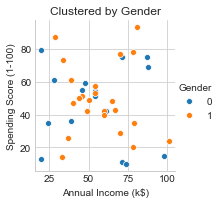

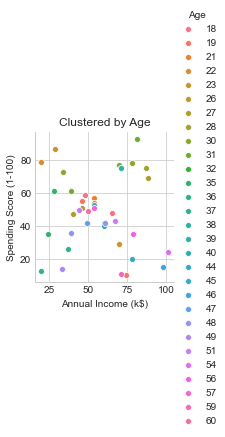

In [679]:
# Display scatterplot with Mall customer segment using Age as criteria for test set
Hclustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_test[features])
df_test = df_test.assign(cluster = Hclustering.labels_)

g.fig.set_size_inches(4, 4)


g = sns.pairplot(x_vars = 'Annual Income (k$)', y_vars = 'Spending Score (1-100)', hue = 'Gender', data=df_test)
plt.title('Clustered by Gender')

g = sns.pairplot(x_vars = 'Annual Income (k$)', y_vars = 'Spending Score (1-100)', hue = 'Age', data=df_test)
plt.title('Clustered by Age')

### Summary

* Both clutsering algorithms can be used to perform unsupervise learning on Mall customer segmentation.

* 2 clusters and 3 clusters show the same results in both K-means algorithm and Hierarchy Agglomerative Clustering Algorithms 

* The scatterplot shows that those who have high income and high spending score are aged between late 20s and mid 30s

* The scatterplot also shows that those who have low income and high spending score are aged between 18 and mid 20s.


## What I learn from this project

* I learn that k-means only works with small features but it is simple and easy to apply to scalable dataset.

* Hierarchical clustering can be categorized in two ways; agglomerative or divisive.

* Scaling data is important when features are in different unit meansurements

* Upsupervised learning is helpful when searching for unknown similarities and differences in data and creating corresponding groups. For example, user categorization by their social media activity. 

* Unsupervised leaning algorithm are such as BIRCH, CURE, Hierarchical, K-means, Fuzzy, Expectation-maximization (EM), DBSCAN, OPTIONS,and mean shift.

* The performance of a machine learning model can be evaluated by Accuracy, Precison, Recall, andf F1-scsore.